In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df= pd.read_csv('Global_Cybersecurity_Threats_2015-2024.csv')

In [3]:
df

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68
...,...,...,...,...,...,...,...,...,...,...
2995,UK,2021,Ransomware,Government,51.42,190694,Unknown,Social Engineering,Firewall,52
2996,Brazil,2023,SQL Injection,Telecommunications,30.28,892843,Hacker Group,Zero-day,VPN,26
2997,Brazil,2017,SQL Injection,IT,32.97,734737,Nation-state,Weak Passwords,AI-based Detection,30
2998,UK,2022,SQL Injection,IT,32.17,379954,Insider,Unpatched Software,Firewall,9


In [5]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


In [7]:
df.shape

(3000, 10)

In [8]:
df.describe()

,Year,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours)
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2019.570333,50.492970,504684.136333,36.476000
std,2.857932,28.791415,289944.084972,20.570768
min,2015.000000,0.500000,424.000000,1.000000
25%,2017.000000,25.757500,255805.250000,19.000000
50%,2020.000000,50.795000,504513.000000,37.000000
75%,2022.000000,75.630000,758088.500000,55.000000
max,2024.000000,99.990000,999635.000000,72.000000


In [64]:
df['Year'].value_counts()

Year
2017    319
2022    318
2023    315
2020    315
2018    310
2024    299
2021    299
2016    285
2015    277
2019    263
Name: count, dtype: int64

In [65]:
df['Country'].value_counts()

Country
UK           321
Brazil       310
India        308
France       305
Japan        305
Australia    297
Russia       295
Germany      291
USA          287
China        281
Name: count, dtype: int64

In [66]:
df['Attack Type'].value_counts()

Attack Type
DDoS                 531
Phishing             529
SQL Injection        503
Ransomware           493
Malware              485
Man-in-the-Middle    459
Name: count, dtype: int64

In [67]:
df['Target Industry'].value_counts()

Target Industry
IT                    478
Banking               445
Healthcare            429
Retail                423
Education             419
Telecommunications    403
Government            403
Name: count, dtype: int64

In [73]:
df['Attack Source'].value_counts()

Attack Source
Nation-state    794
Unknown         768
Insider         752
Hacker Group    686
Name: count, dtype: int64

In [74]:
df['Security Vulnerability Type'].value_counts()

Security Vulnerability Type
Zero-day              785
Social Engineering    747
Unpatched Software    738
Weak Passwords        730
Name: count, dtype: int64

In [75]:
df['Defense Mechanism Used'].value_counts()

Defense Mechanism Used
Antivirus             628
VPN                   612
Encryption            592
Firewall              585
AI-based Detection    583
Name: count, dtype: int64

In [9]:
# Count of attacks by type
attack_type_counts = df['Attack Type'].value_counts()

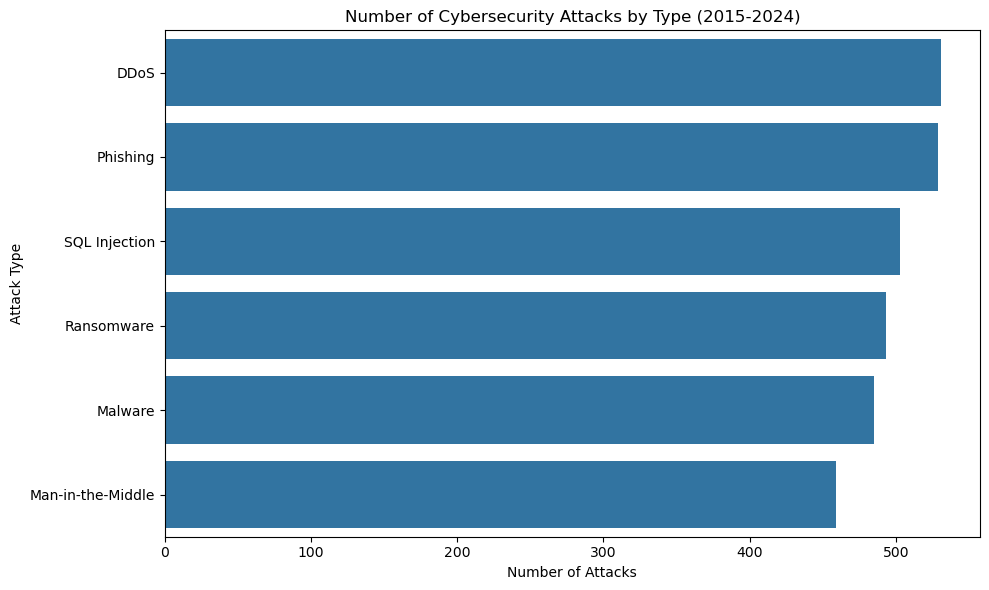

In [11]:
# Plot: Number of Attacks by Type
plt.figure(figsize=(10, 6))
sns.barplot(x=attack_type_counts.values, y=attack_type_counts.index)
plt.title('Number of Cybersecurity Attacks by Type (2015-2024)')
plt.xlabel('Number of Attacks')
plt.ylabel('Attack Type')
plt.tight_layout()
plt.show()

In [12]:
# Financial loss by attack type
loss_by_attack = df.groupby('Attack Type')['Financial Loss (in Million $)'].mean().sort_values(ascending=False)

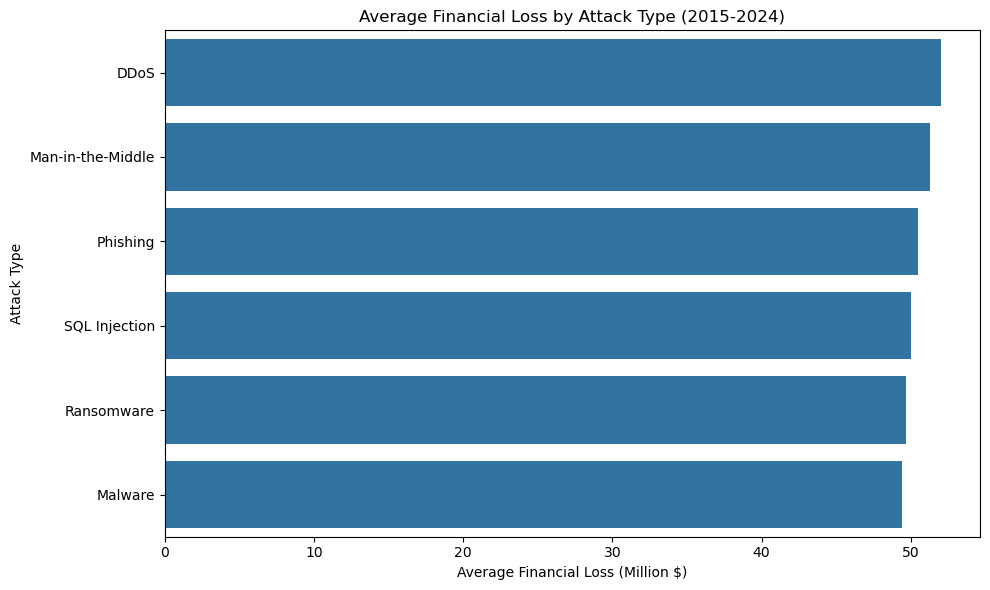

In [14]:
# Plot: Average Financial Loss by Attack Type
plt.figure(figsize=(10, 6))
sns.barplot(x=loss_by_attack.values, y=loss_by_attack.index)
plt.title('Average Financial Loss by Attack Type (2015-2024)')
plt.xlabel('Average Financial Loss (Million $)')
plt.ylabel('Attack Type')
plt.tight_layout()
plt.show()

In [15]:
# Count of attacks by industry
industry_counts = df['Target Industry'].value_counts()

<function matplotlib.pyplot.show(close=None, block=None)>

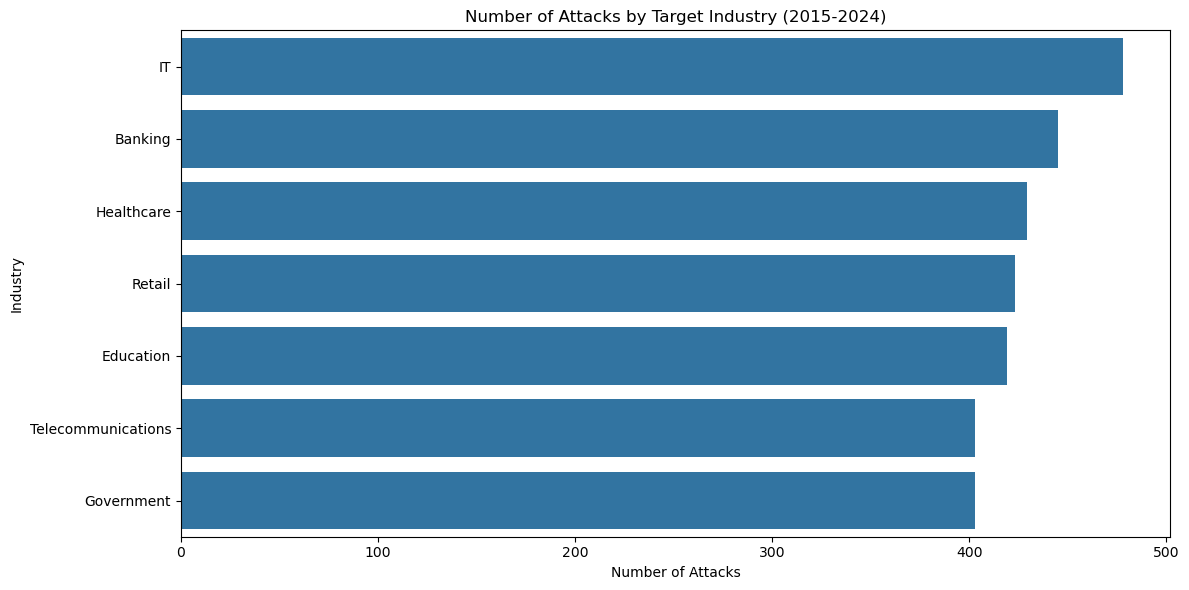

In [16]:
# Plot: Attacks by Industry
plt.figure(figsize=(12, 6))
sns.barplot(x=industry_counts.values, y=industry_counts.index)
plt.title('Number of Attacks by Target Industry (2015-2024)')
plt.xlabel('Number of Attacks')
plt.ylabel('Industry')
plt.tight_layout()
plt.show

In [17]:
# Financial loss by industry
loss_by_industry = df.groupby('Target Industry')['Financial Loss (in Million $)'].mean().sort_values(ascending=False)

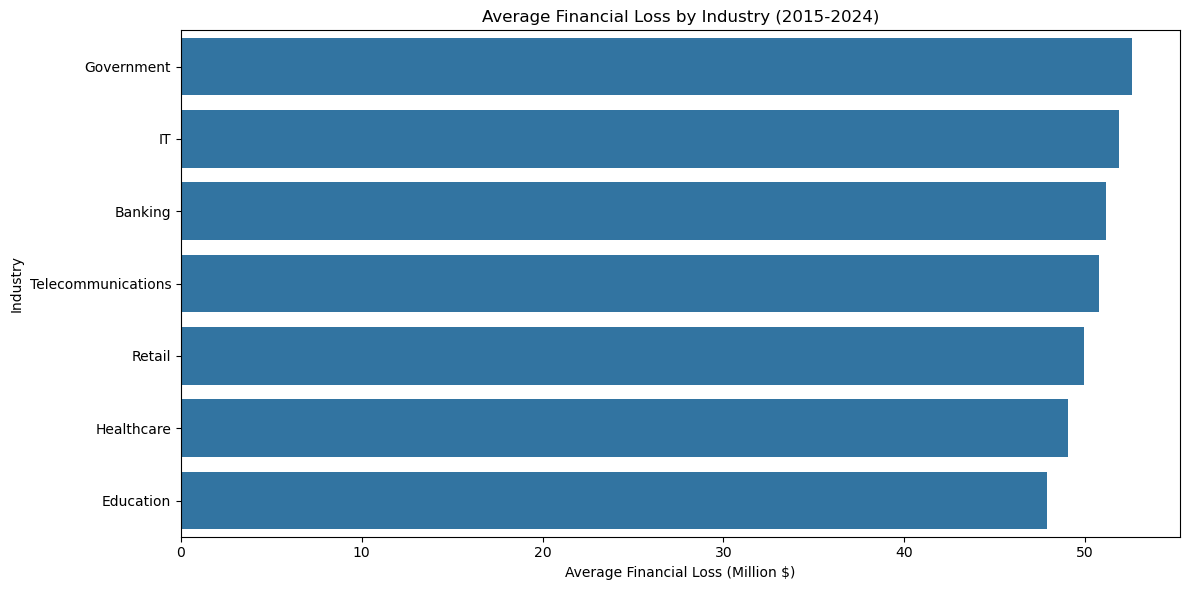

In [18]:
# Plot: Average Financial Loss by Industry
plt.figure(figsize=(12, 6))
sns.barplot(x=loss_by_industry.values, y=loss_by_industry.index)
plt.title('Average Financial Loss by Industry (2015-2024)')
plt.xlabel('Average Financial Loss (Million $)')
plt.ylabel('Industry')
plt.tight_layout()
plt.show()

In [19]:
# Top 10 countries by number of attacks
top_countries = df['Country'].value_counts().head(10)

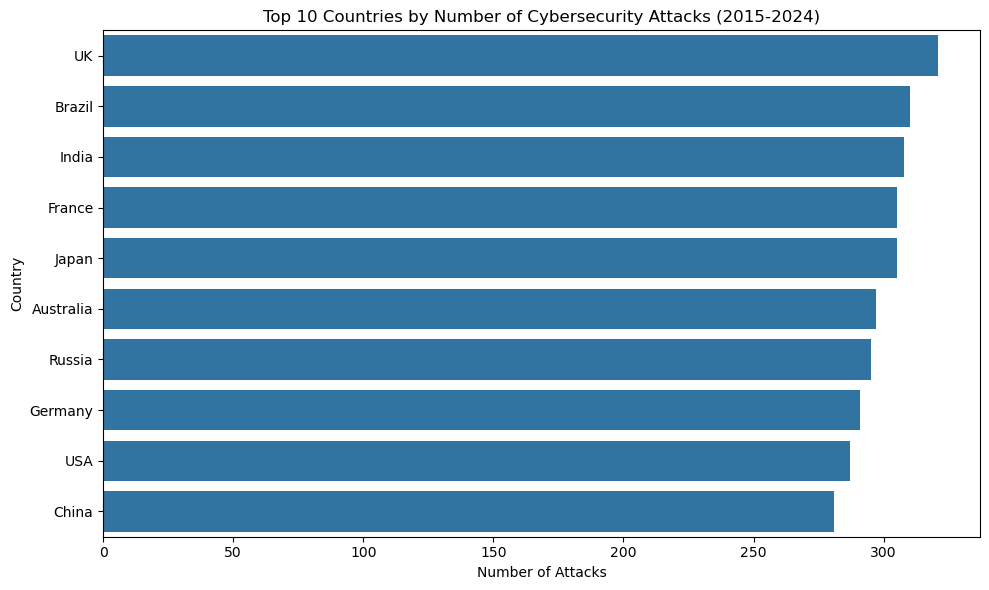

In [20]:
# Plot: Top 10 Countries by Number of Attacks
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries by Number of Cybersecurity Attacks (2015-2024)')
plt.xlabel('Number of Attacks')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [21]:
# Number of attacks per year
attacks_by_year = df['Year'].value_counts().sort_index()

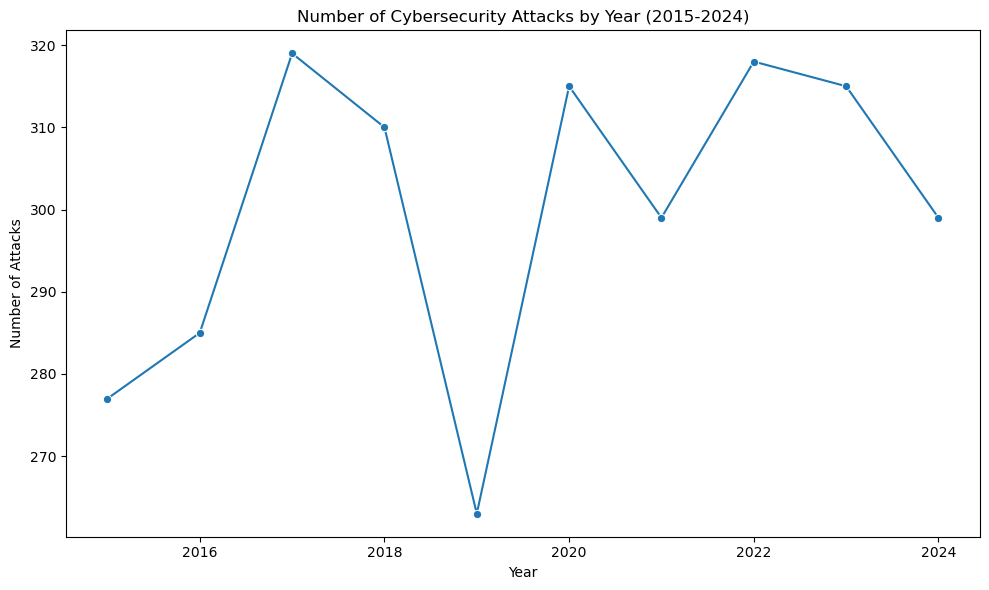

In [22]:
# Plot: Number of Attacks by Year
plt.figure(figsize=(10, 6))
sns.lineplot(x=attacks_by_year.index, y=attacks_by_year.values, marker='o')
plt.title('Number of Cybersecurity Attacks by Year (2015-2024)')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.tight_layout()
plt.show()

In [23]:
# Average financial loss by year
loss_by_year = df.groupby('Year')['Financial Loss (in Million $)'].mean()

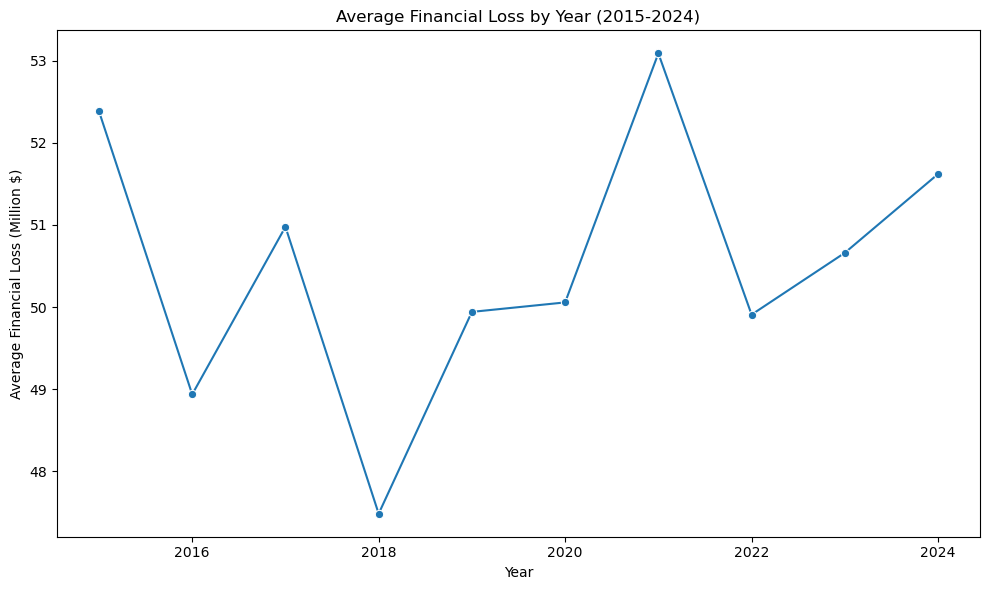

In [24]:
# Plot: Average Financial Loss by Year
plt.figure(figsize=(10, 6))
sns.lineplot(x=loss_by_year.index, y=loss_by_year.values, marker='o')
plt.title('Average Financial Loss by Year (2015-2024)')
plt.xlabel('Year')
plt.ylabel('Average Financial Loss (Million $)')
plt.tight_layout()
plt.show()

In [25]:
# Count of attacks by vulnerability type
vulnerability_counts = df['Security Vulnerability Type'].value_counts()

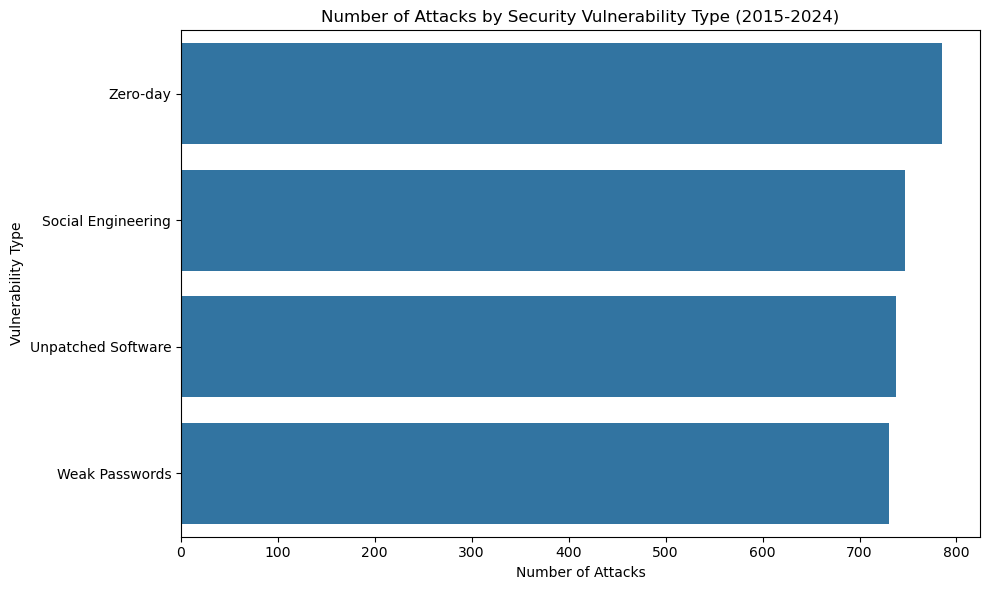

In [26]:
# Plot: Attacks by Vulnerability Type
plt.figure(figsize=(10, 6))
sns.barplot(x=vulnerability_counts.values, y=vulnerability_counts.index)
plt.title('Number of Attacks by Security Vulnerability Type (2015-2024)')
plt.xlabel('Number of Attacks')
plt.ylabel('Vulnerability Type')
plt.tight_layout()
plt.show()

In [27]:
# Count of attacks by source
source_counts = df['Attack Source'].value_counts()

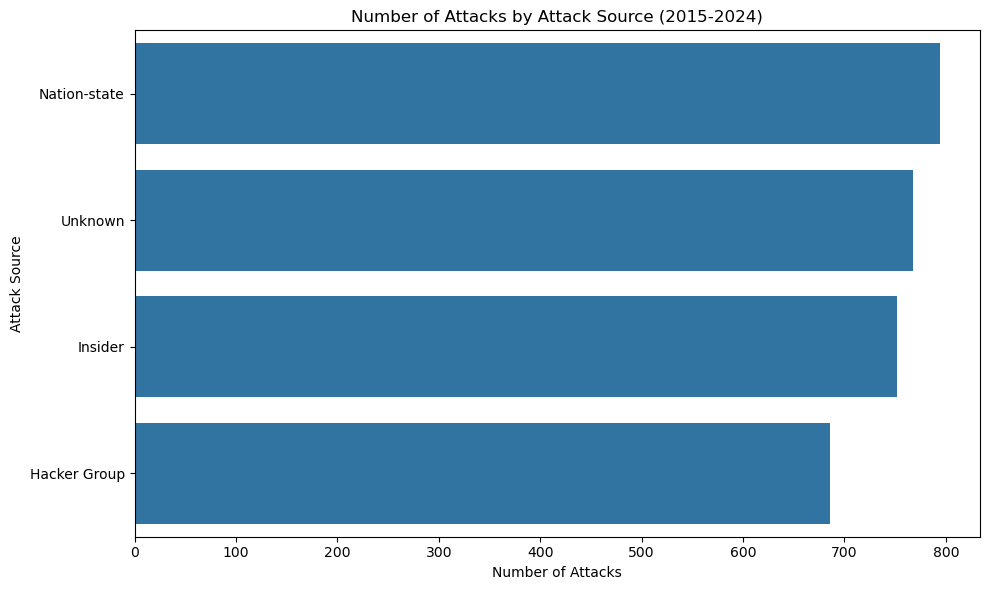

In [28]:
# Plot: Attacks by Source
plt.figure(figsize=(10, 6))
sns.barplot(x=source_counts.values, y=source_counts.index)
plt.title('Number of Attacks by Attack Source (2015-2024)')
plt.xlabel('Number of Attacks')
plt.ylabel('Attack Source')
plt.tight_layout()
plt.show()

In [29]:
# Correlation between numerical columns
correlation_matrix = df[['Financial Loss (in Million $)', 'Number of Affected Users', 'Incident Resolution Time (in Hours)']].corr()

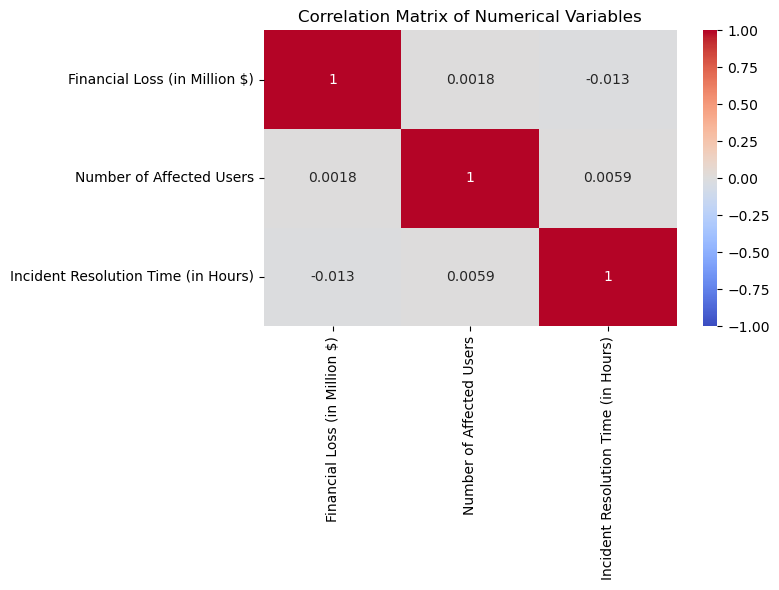

In [30]:
# Plot: Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

In [31]:
# Average resolution time by defense mechanism
resolution_by_defense = df.groupby('Defense Mechanism Used')['Incident Resolution Time (in Hours)'].mean().sort_values()

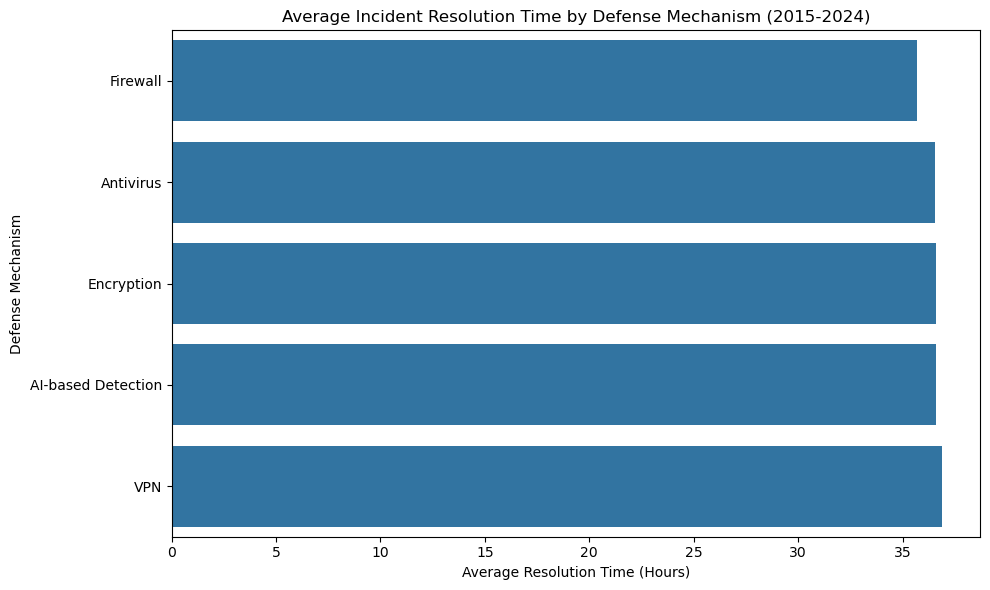

In [32]:
# Plot: Average Resolution Time by Defense Mechanism
plt.figure(figsize=(10, 6))
sns.barplot(x=resolution_by_defense.values, y=resolution_by_defense.index)
plt.title('Average Incident Resolution Time by Defense Mechanism (2015-2024)')
plt.xlabel('Average Resolution Time (Hours)')
plt.ylabel('Defense Mechanism')
plt.tight_layout()
plt.show()

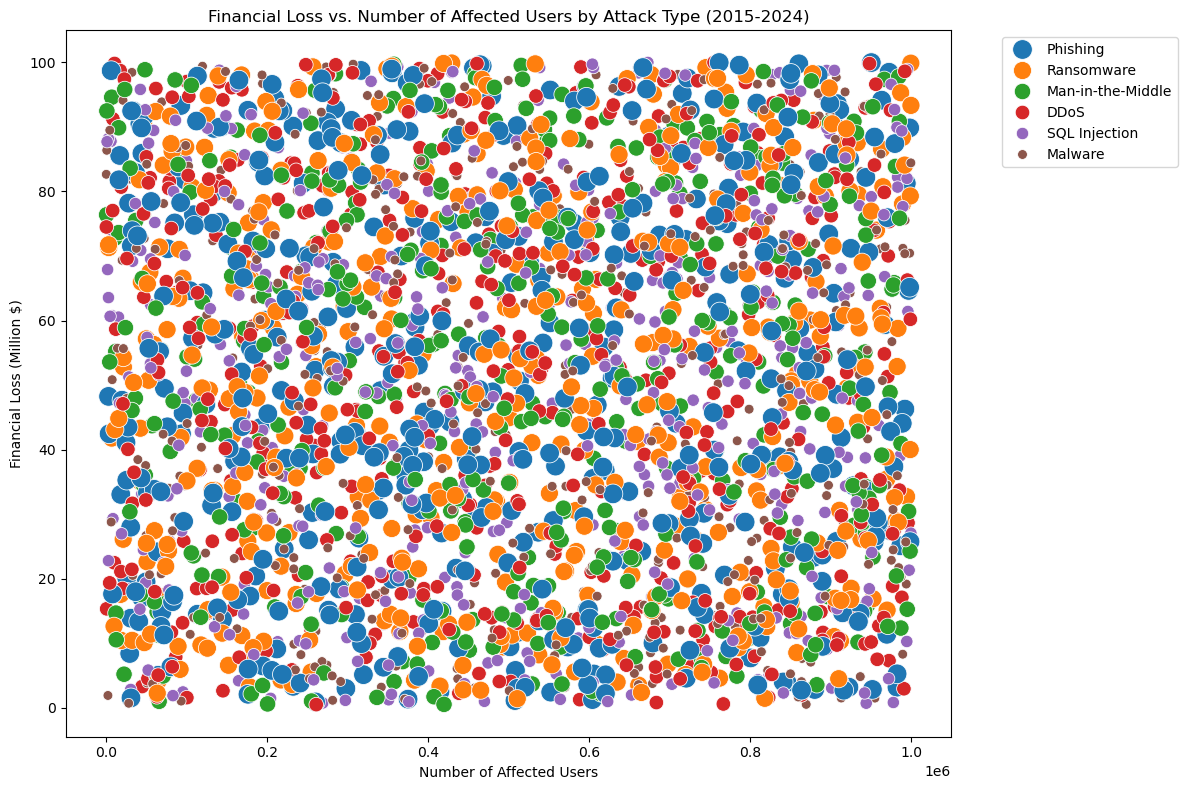

In [34]:
# Scatter Plot: Financial Loss vs. Number of Affected Users by Attack Type ---
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Number of Affected Users', y='Financial Loss (in Million $)', hue='Attack Type', size='Attack Type', sizes=(50, 200))
plt.title('Financial Loss vs. Number of Affected Users by Attack Type (2015-2024)')
plt.xlabel('Number of Affected Users')
plt.ylabel('Financial Loss (Million $)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### Scatter Plot: Shows how financial loss correlates with affected users, with attack types like Ransomware often causing high losses.

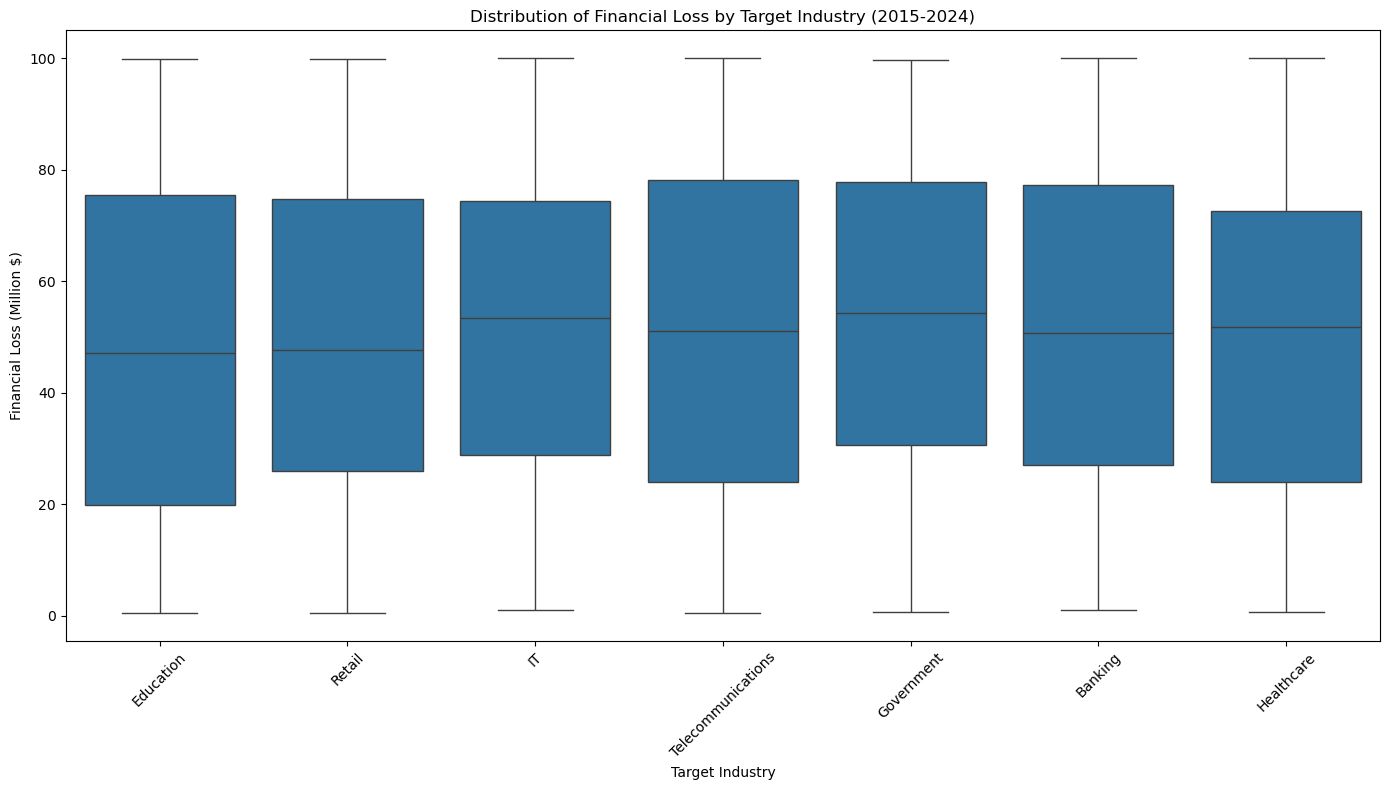

In [35]:
# Box Plot: Financial Loss by Target Industry ---
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Target Industry', y='Financial Loss (in Million $)')
plt.title('Distribution of Financial Loss by Target Industry (2015-2024)')
plt.xlabel('Target Industry')
plt.ylabel('Financial Loss (Million $)')
plt.xticks(rotation=45)
plt.tight_layout()

##### Box Plot: Reveals industries with high variability in financial losses, e.g., Banking may have outliers.

In [53]:
# Create a pivot table for attack types by industry
pivot_attack_industry = df.pivot_table(index='Target Industry', columns='Attack Type', aggfunc='size', fill_value=0)

<Figure size 1400x800 with 0 Axes>

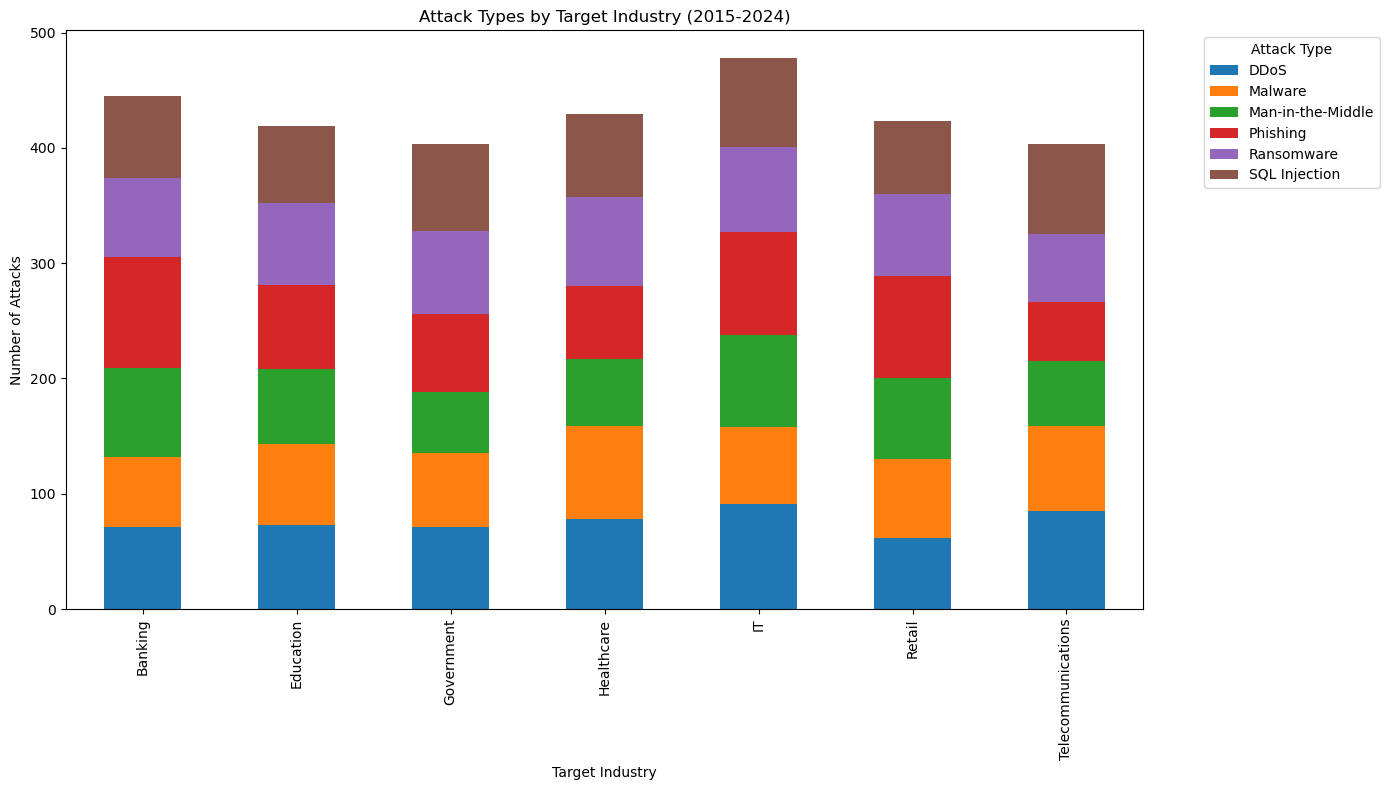

In [42]:
# Plot: Stacked Bar Plot
plt.figure(figsize=(14, 8))
pivot_attack_industry.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Attack Types by Target Industry (2015-2024)')
plt.xlabel('Target Industry')
plt.ylabel('Number of Attacks')
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### Stacked Bar: Displays how attack types are distributed across industries, e.g., Phishing may dominate in Banking.

In [45]:
# Create a pivot table for attack type vs. vulnerability type
pivot_attack_vuln = df.pivot_table(index='Attack Type', columns='Security Vulnerability Type', aggfunc='size', fill_value=0)

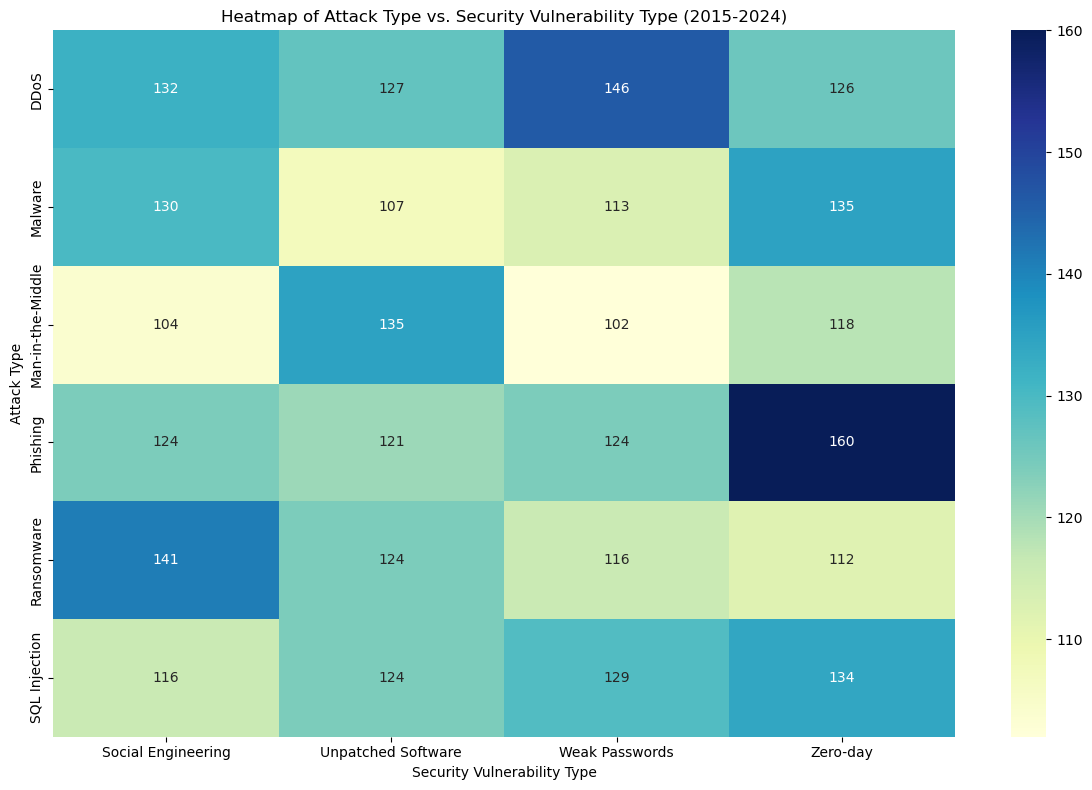

In [46]:
# Plot: Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_attack_vuln, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Attack Type vs. Security Vulnerability Type (2015-2024)')
plt.xlabel('Security Vulnerability Type')
plt.ylabel('Attack Type')
plt.tight_layout()
plt.show()

##### Heatmap: Identifies which vulnerabilities are commonly exploited by specific attack types.

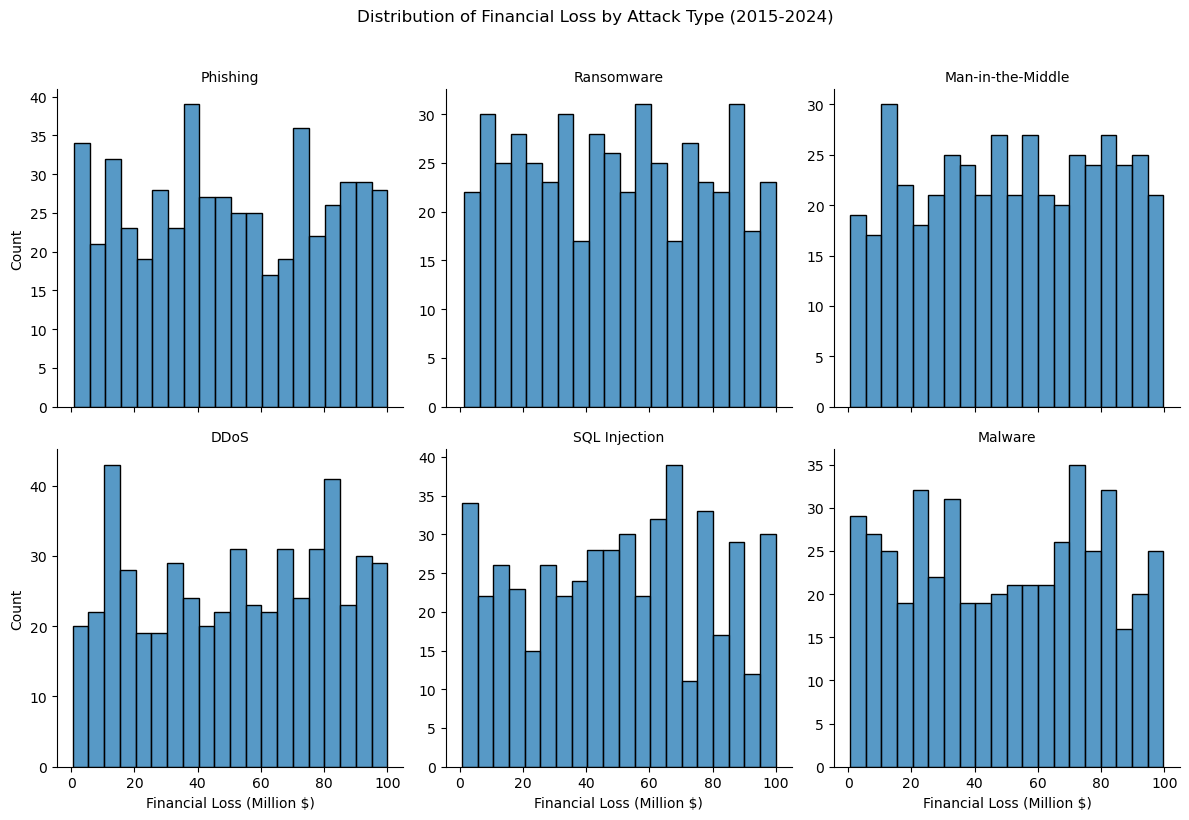

In [47]:
#  Facet Grid: Financial Loss by Year and Attack Type ---
g = sns.FacetGrid(df, col='Attack Type', col_wrap=3, height=4, sharey=False)
g.map(sns.histplot, 'Financial Loss (in Million $)', bins=20)
g.set_titles('{col_name}')
g.set_xlabels('Financial Loss (Million $)')
g.set_ylabels('Count')
plt.suptitle('Distribution of Financial Loss by Attack Type (2015-2024)', y=1.02)
plt.tight_layout()
plt.show()

##### Facet Grid: Shows the distribution of financial losses for each attack type, highlighting skewness.

In [49]:
# Line Plot: Average Financial Loss by Attack Source Over Years ---
loss_by_source_year = df.groupby(['Year', 'Attack Source'])['Financial Loss (in Million $)'].mean().unstack()

<Figure size 1200x800 with 0 Axes>

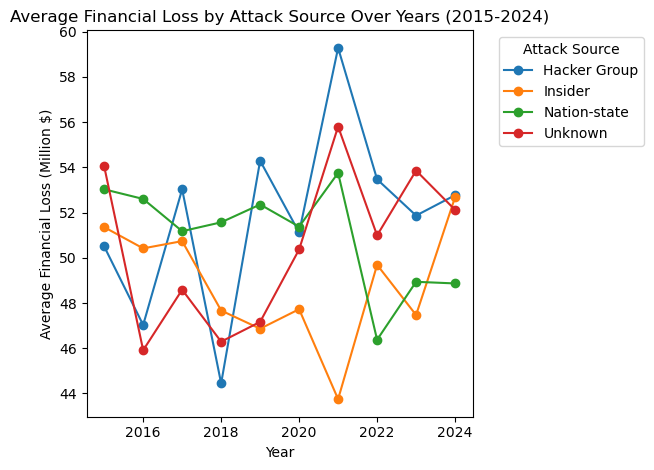

In [50]:
# Plot: Line Plot
plt.figure(figsize=(12, 8))
loss_by_source_year.plot(kind='line', marker='o')
plt.title('Average Financial Loss by Attack Source Over Years (2015-2024)')
plt.xlabel('Year')
plt.ylabel('Average Financial Loss (Million $)')
plt.legend(title='Attack Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

##### Line Plot: Tracks how financial losses from different attack sources evolve over time.

In [62]:
# --- 10. Key Insights ---
print("\nKey Insights:")
print(f"1. Most common attack type: {attack_type_counts.idxmax()} ({attack_type_counts.max()} attacks)")
print(f"2. Industry with highest average financial loss: {loss_by_industry.idxmax()} (${loss_by_industry.max():.2f}M)")
print(f"3. Country with most attacks: {top_countries.idxmax()} ({top_countries.max()} attacks)")
print(f"4. Most exploited vulnerability: {vulnerability_counts.idxmax()} ({vulnerability_counts.max()} attacks)")
print(f"5. Most common attack source: {source_counts.idxmax()} ({source_counts.max()} attacks)")
print(f"6. Fastest defense mechanism (avg resolution time): {resolution_by_defense.idxmin()} ({resolution_by_defense.min():.2f} hours)")


Key Insights:
1. Most common attack type: DDoS (531 attacks)
2. Industry with highest average financial loss: Government ($52.62M)
3. Country with most attacks: UK (321 attacks)
4. Most exploited vulnerability: Zero-day (785 attacks)
5. Most common attack source: Nation-state (794 attacks)
6. Fastest defense mechanism (avg resolution time): Firewall (35.71 hours)
